# Загрузка данных
_Вихляев Егор Сегреевич_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset.csv')

# EDA

**employee_id:** Уникальный идентификатор сотрудника.

**department:** Название отдела, в котором работает сотрудник.

**region:** Регион, в котором работает сотрудник.

**education:** Уровень образования сотрудника. 

**gender:** Пол сотрудника.

**recruitment_channel:** Канал, через который был нанят сотрудник.

**nooftrainings:** Количество тренировок или обучающих программ, которые прошел сотрудник за определенный период времени.

**age:** Возраст сотрудника.

**previousyearrating:** Оценка сотрудника за предыдущий год.

**lengthofservice:** Стаж работы сотрудника в компании, обычно в годах.

**KPIs_met >80%:** Бинарный индикатор (1 или 0), указывающий, достиг ли сотрудник более 80% своих ключевых показателей эффективности (KPI).

**awards_won?:** Бинарный индикатор (1 или 0), указывающий, получил ли сотрудник какие-либо награды.

**avgtrainingscore:** Средний балл за все пройденные сотрудником тренировки.

**is_promoted:** Целевая переменная, указывающая, получил ли сотрудник повышение (1) или нет (0).

**ML-задача:** Бинарная классификация

#### A. Первичный осмотр данных

In [3]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [5]:
data.sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
959,6428,Sales & Marketing,region_13,Bachelor's,m,sourcing,1,32,1.0,5,0,0,50,0
42257,3012,Procurement,region_2,Bachelor's,m,other,1,44,3.0,6,0,0,66,0
6615,50766,Analytics,region_22,Bachelor's,m,sourcing,1,33,5.0,6,0,0,82,0
36963,43550,Legal,region_2,Bachelor's,m,sourcing,1,34,5.0,9,0,0,57,0
16272,74209,Procurement,region_13,Bachelor's,m,sourcing,1,30,3.0,7,0,0,69,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


#### B. Обработка пропущенных значений

In [8]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
# Заполним пропуски в previous_year_rating медианным значением
data.fillna({'previous_year_rating': data.previous_year_rating.median()}, inplace=True)

In [10]:
# Обработка пропусков в education: заполнение самым часто встречающимся значением
most_common_education = data['education'].mode()[0]
data['education'] = data['education'].fillna(most_common_education)

In [11]:
#Проверим
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

#### С. Анализ распределения переменных

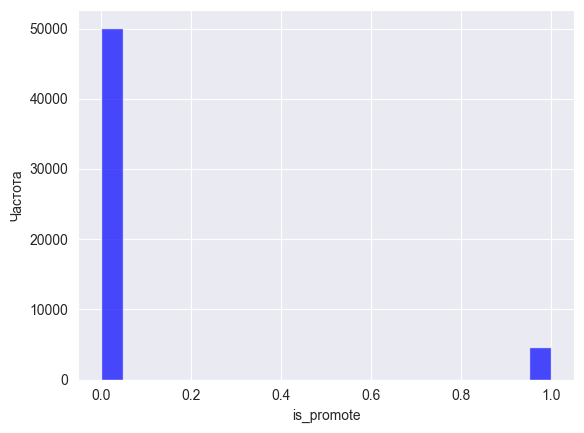

In [12]:
plt.hist(data['is_promoted'], bins=20, color='blue', alpha=0.7)
plt.xlabel('is_promote')
plt.ylabel('Частота')
plt.show()

#### D. Анализ распределения категориальных переменных

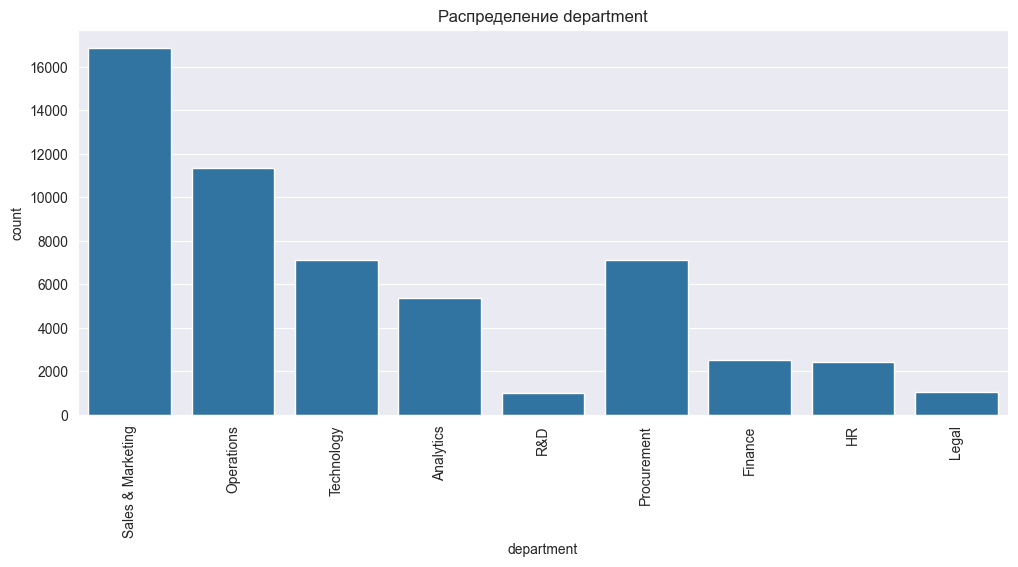

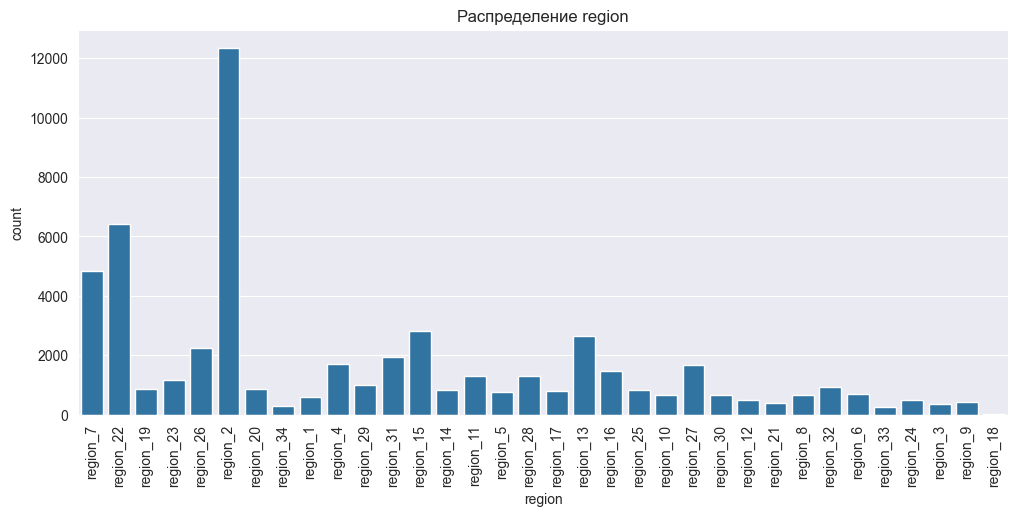

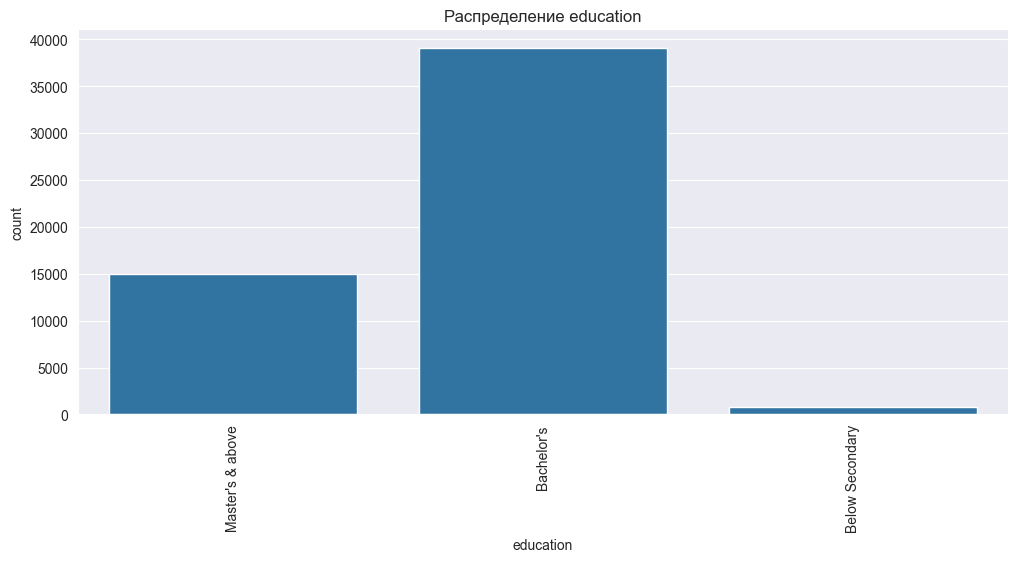

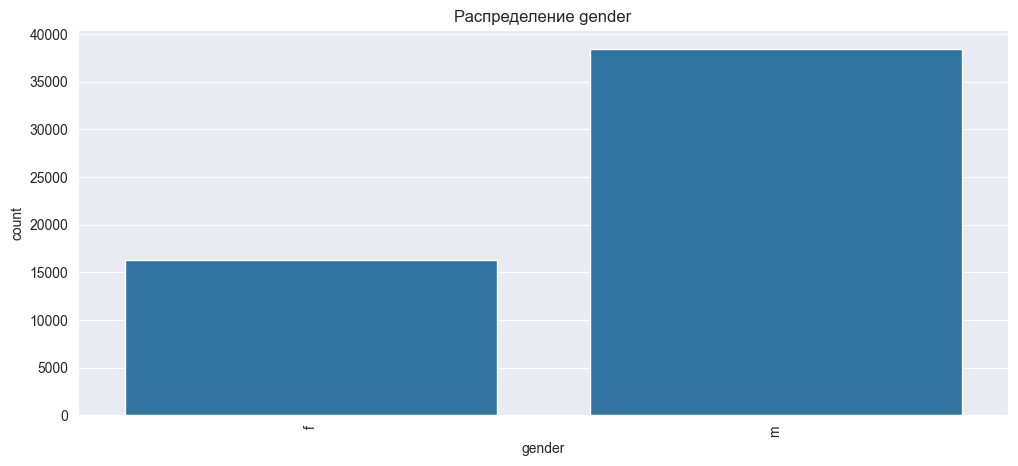

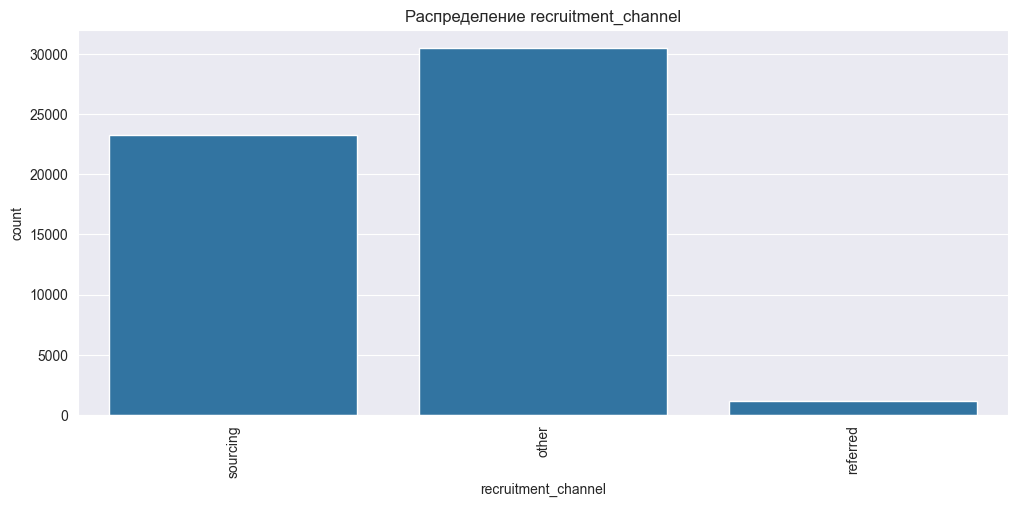

In [13]:
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']

for column in categorical_columns:
    plt.figure(figsize=(12, 5))
    sns.countplot(x=data[column])
    plt.title(f'Распределение {column}')
    plt.xticks(rotation=90)
    plt.show()


#### E. Исследование корреляций между переменными

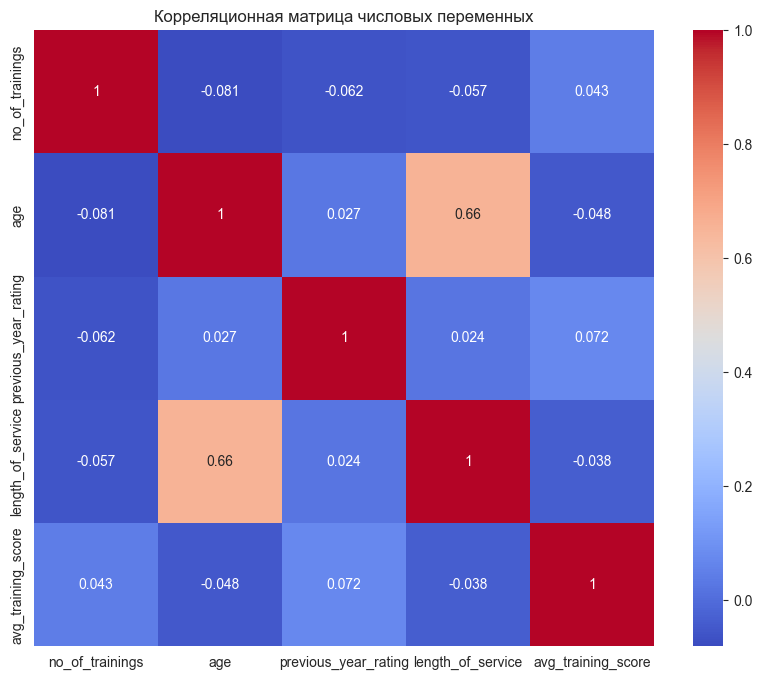

In [14]:
numerical_columns = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']

plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых переменных')
plt.show()

#### F. Анализ целевой переменной

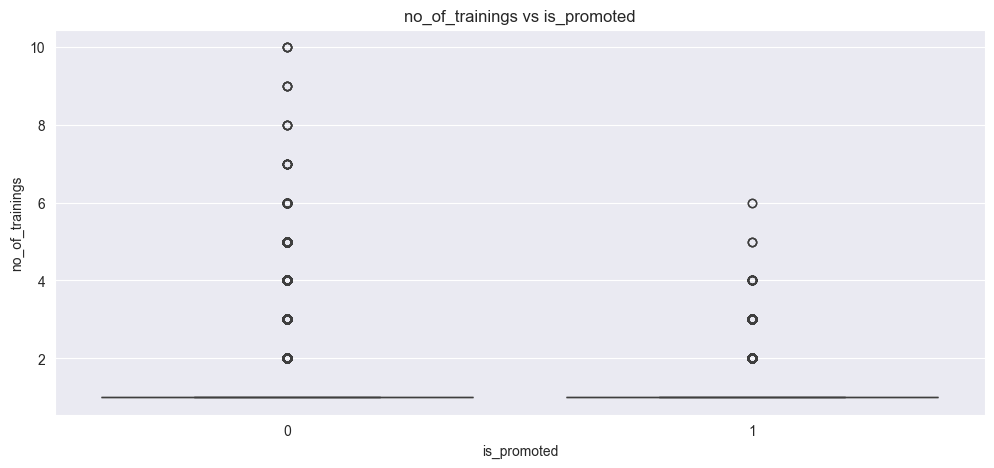

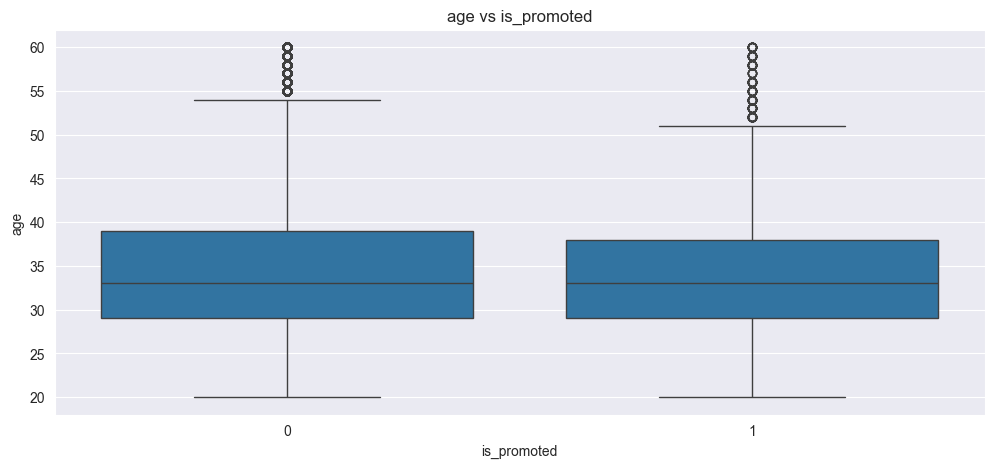

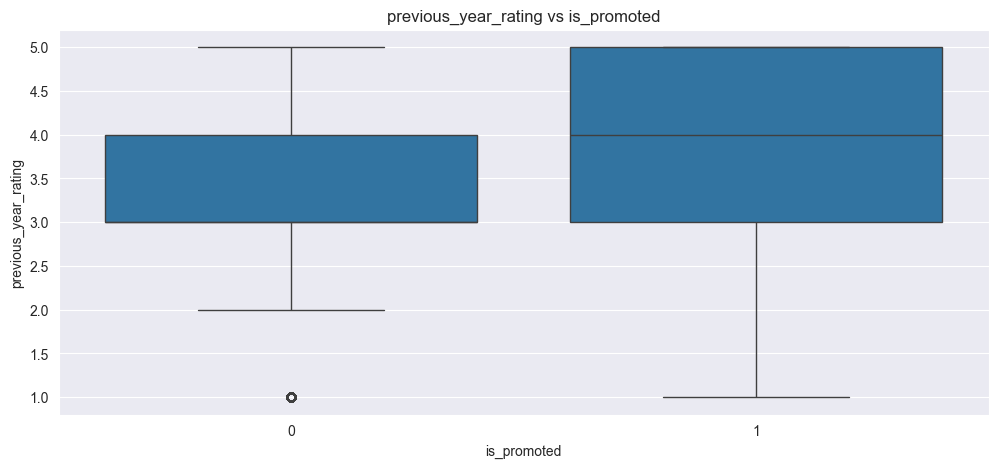

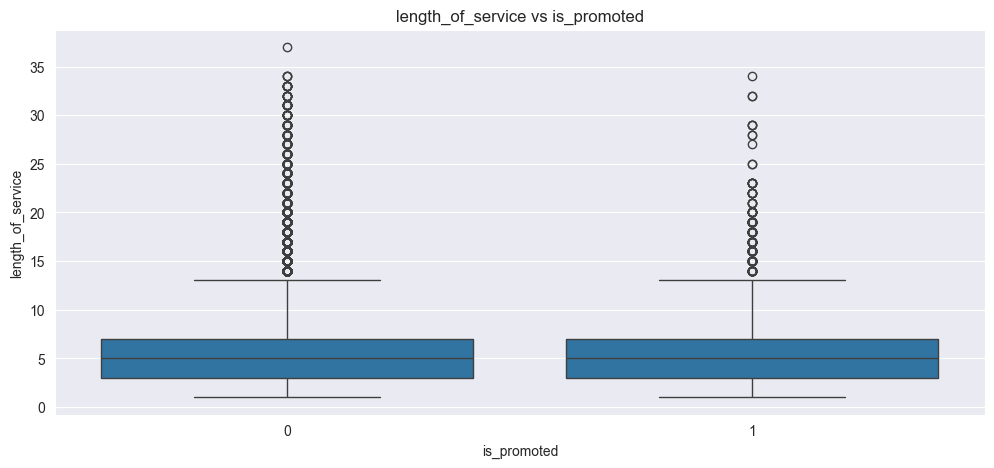

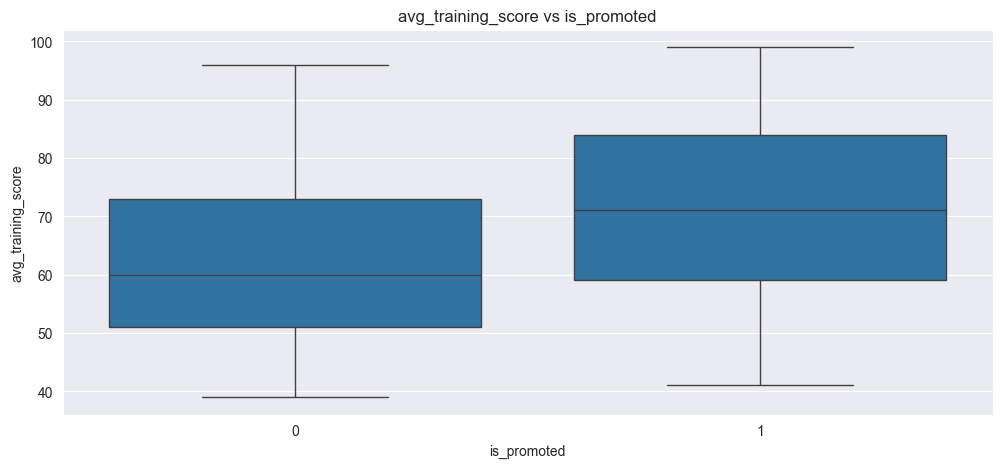

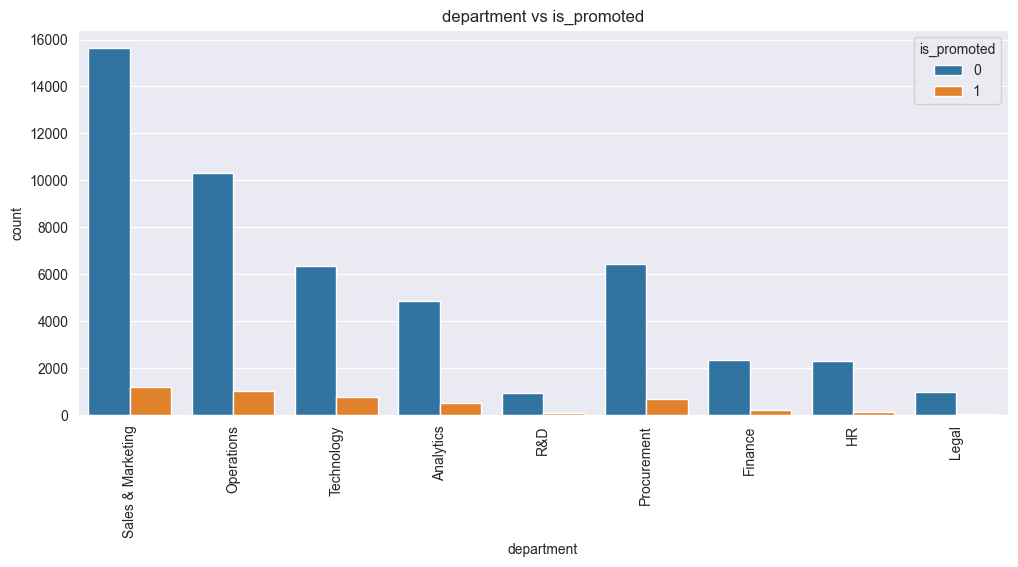

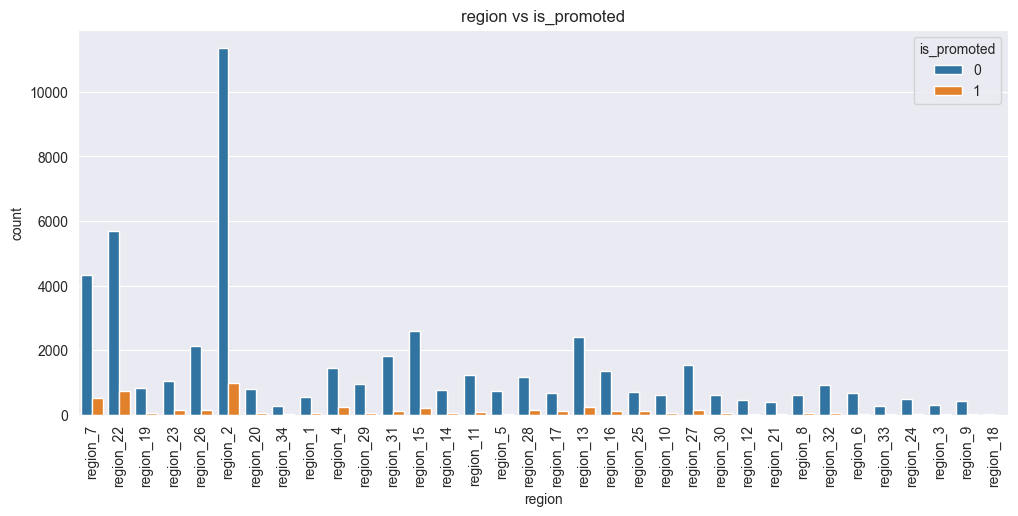

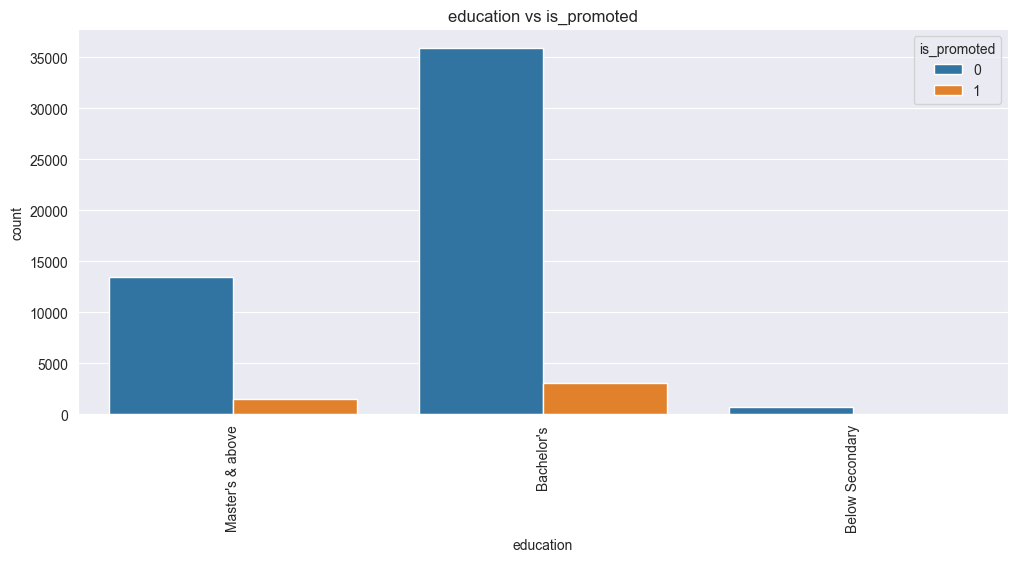

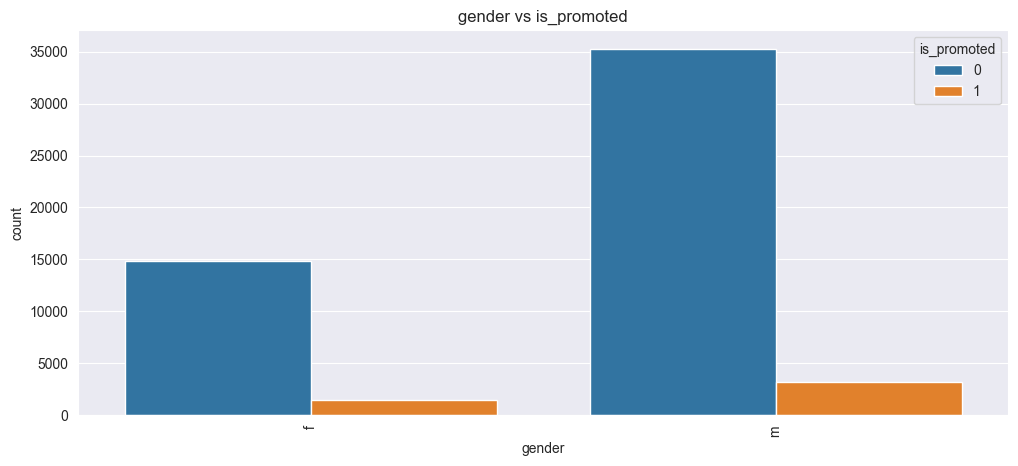

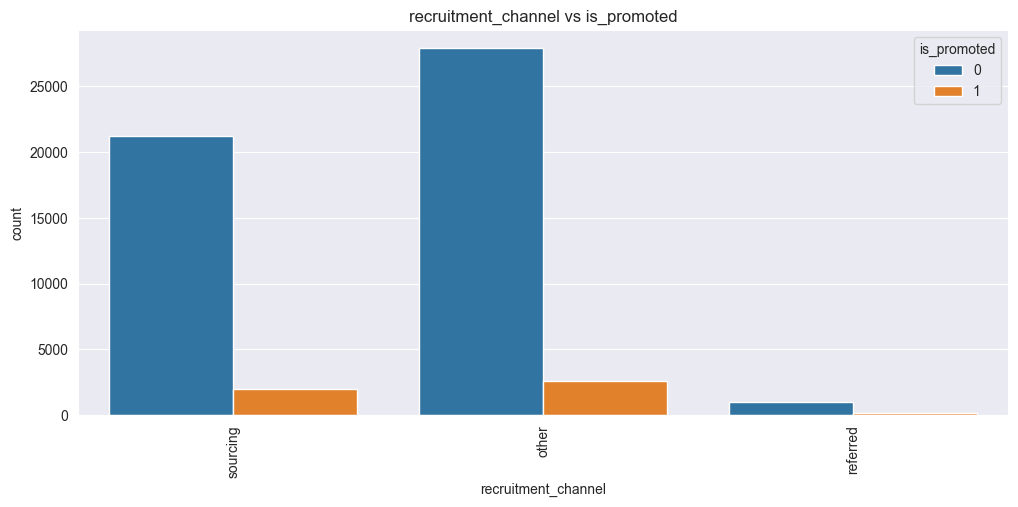

In [15]:
for column in numerical_columns:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='is_promoted', y=column, data=data)
    plt.title(f'{column} vs is_promoted')
    plt.show()

for column in categorical_columns:
    if column != 'is_promoted':
        plt.figure(figsize=(12, 5))
        sns.countplot(x=column, hue='is_promoted', data=data)
        plt.title(f'{column} vs is_promoted')
        plt.xticks(rotation=90)
        plt.show()

#### G: Выбросы

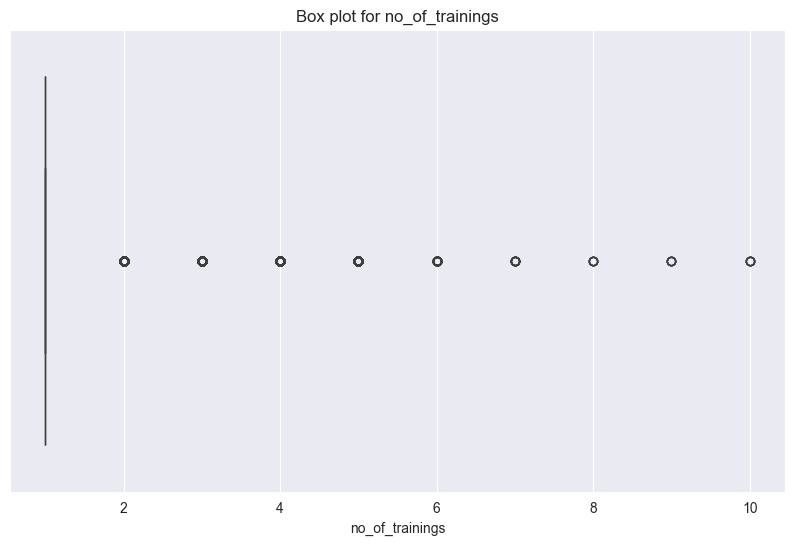

Number of outliers in no_of_trainings: 10430
       no_of_trainings
3                    2
5                    2
13                   2
24                   2
31                   2
...                ...
54788                2
54789                3
54798                2
54800                2
54802                2

[10430 rows x 1 columns]


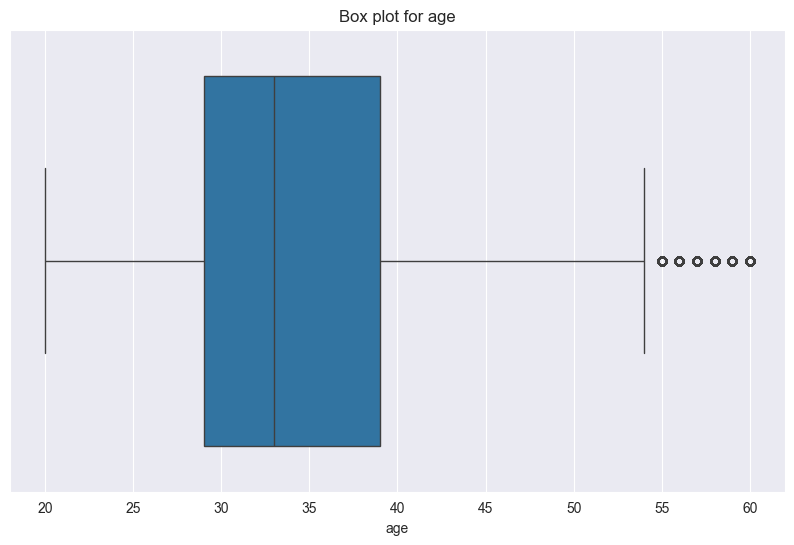

Number of outliers in age: 1435
       age
33      57
42      59
49      56
99      60
307     58
...    ...
54580   57
54617   57
54628   57
54749   55
54792   59

[1435 rows x 1 columns]


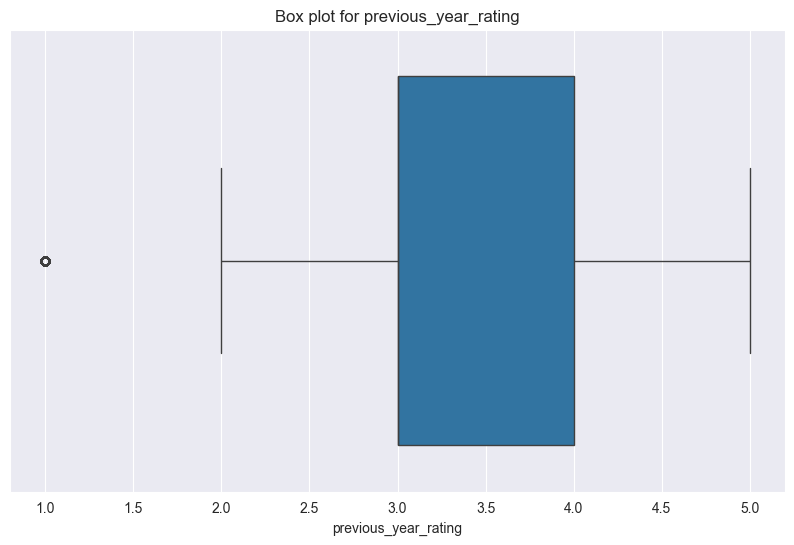

Number of outliers in previous_year_rating: 6223
       previous_year_rating
3                       1.0
15                      1.0
17                      1.0
31                      1.0
32                      1.0
...                     ...
54791                   1.0
54793                   1.0
54802                   1.0
54806                   1.0
54807                   1.0

[6223 rows x 1 columns]


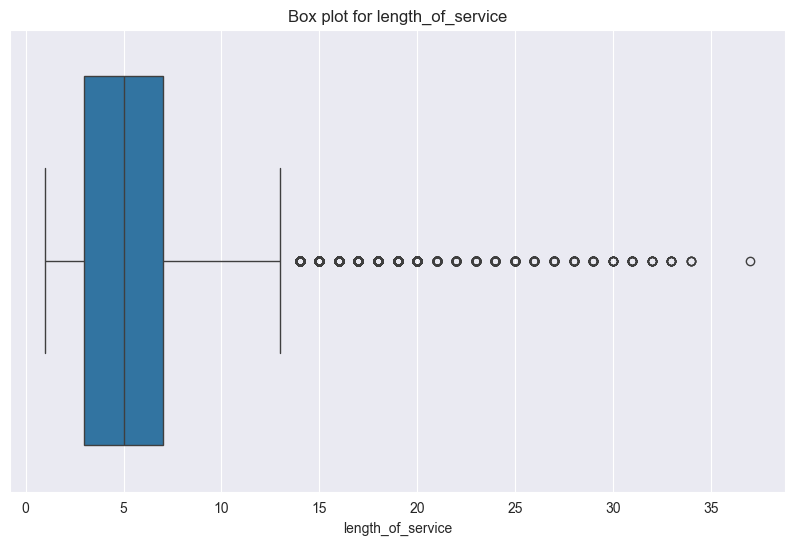

Number of outliers in length_of_service: 3489
       length_of_service
13                    16
42                    26
60                    17
74                    14
99                    17
...                  ...
54691                 19
54695                 18
54697                 15
54754                 14
54803                 17

[3489 rows x 1 columns]


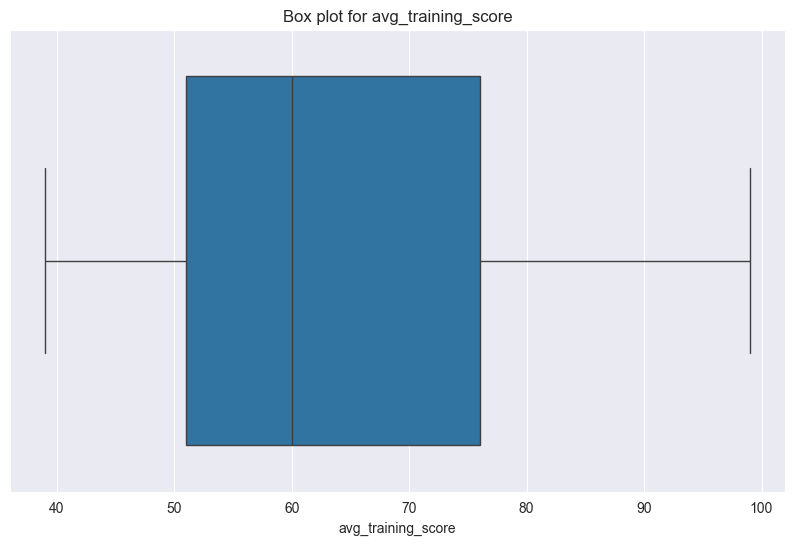

Number of outliers in avg_training_score: 0


In [16]:
numeric_columns = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot for {column}')
    plt.show()
    
    outliers = detect_outliers_iqr(data, column)
    print(f'Number of outliers in {column}: {len(outliers)}')
    if len(outliers) > 0:
        print(outliers[[column]])

#### H: Дубликаты

In [17]:
duplicates_exist = data.duplicated()
print(duplicates_exist)

0        False
1        False
2        False
3        False
4        False
         ...  
54803    False
54804    False
54805    False
54806    False
54807    False
Length: 54808, dtype: bool


## Выводы по EDA:
1. Необходимо заполнить пропущенные значения в education и previous_year_rating _(сделано)_.
2. Имеем дисбаланс классов.
3. Имеются переменные с отрицательной, но очень близкой к нулю корреляцией.
4. Дубликаты отсутствуют.
5. Необходимо обработать выбросы.
6. Необходимо закодировать категориальные переменные.
7. Стоит стандартизировать данные.

# Обработка данных

#### Обработаем выбросы

In [18]:
# Пример обработки выбросов (например, замена на медиану)
for column in numeric_columns:
    outliers = detect_outliers_iqr(data, column)
    if len(outliers) > 0:
        median = data[column].median()
        data.loc[outliers.index, column] = median

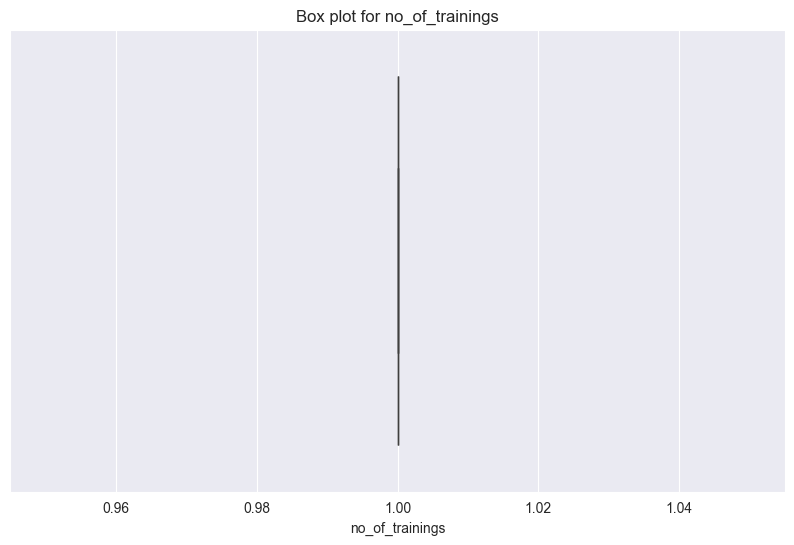

Number of outliers in no_of_trainings: 0


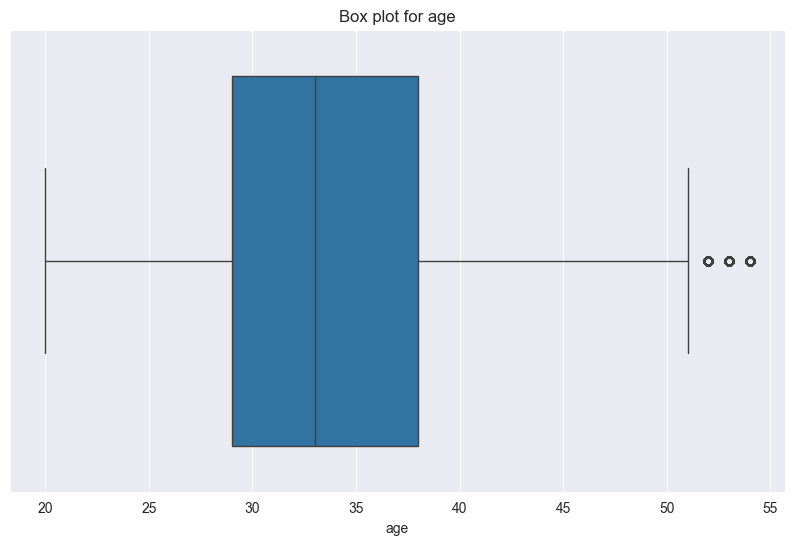

Number of outliers in age: 1028
       age
234     54
268     54
365     53
426     52
515     53
...    ...
54658   52
54670   52
54695   52
54757   54
54777   52

[1028 rows x 1 columns]


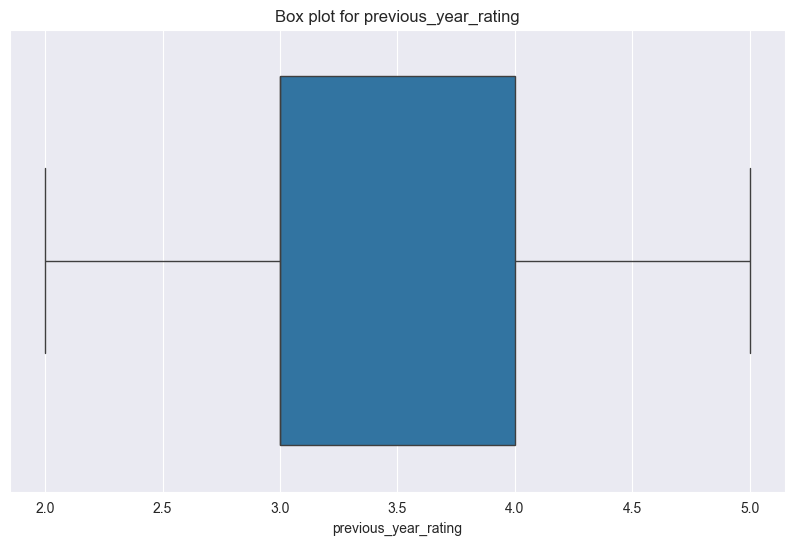

Number of outliers in previous_year_rating: 0


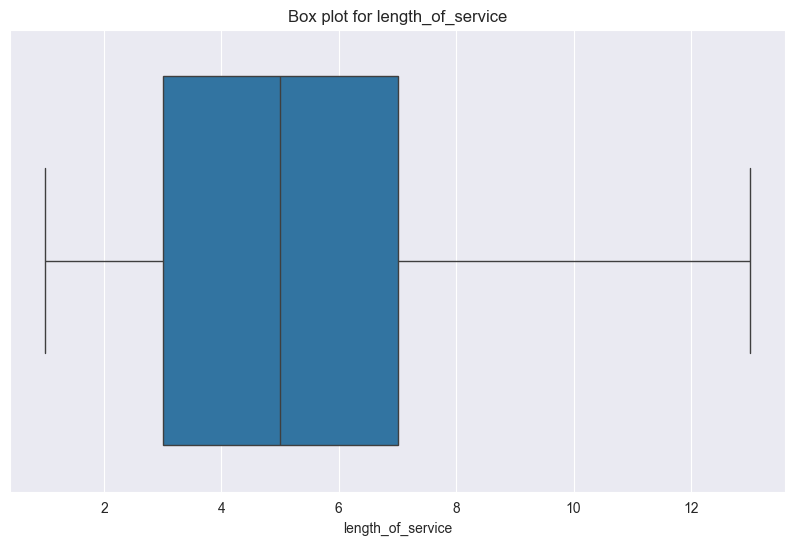

Number of outliers in length_of_service: 0


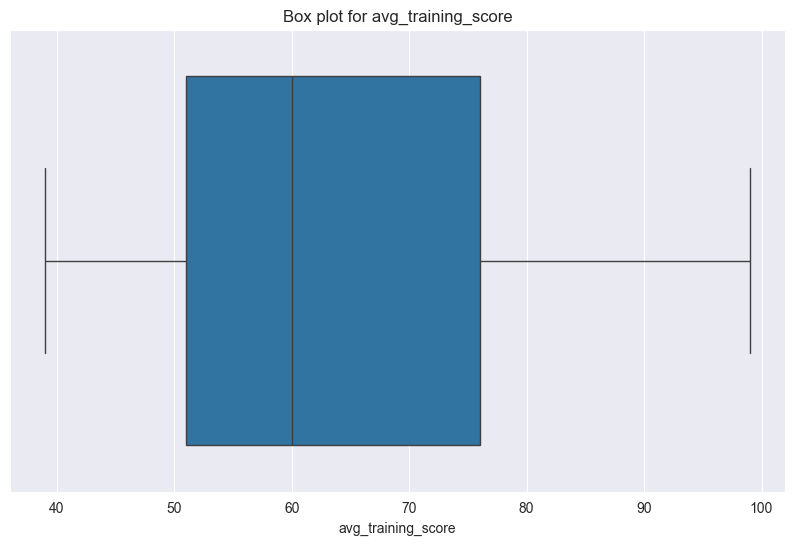

Number of outliers in avg_training_score: 0


In [19]:
# Построение коробчатых диаграмм и выявление выбросов
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot for {column}')
    plt.show()
    
    outliers = detect_outliers_iqr(data, column)
    print(f'Number of outliers in {column}: {len(outliers)}')
    if len(outliers) > 0:
        print(outliers[[column]])

#### Закодируем категориальные переменные

In [20]:
X = data.drop("is_promoted", axis=1)  # Признаки
y = data["is_promoted"]  # Целевая переменная

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Кодирование категориальных переменных, кроме целевой переменной
X['department'] = label_encoder.fit_transform(X['department'])
X['region'] = label_encoder.fit_transform(X['region'])
X['education'] = label_encoder.fit_transform(X['education'])
X['gender'] = label_encoder.fit_transform(X['gender'])
X['recruitment_channel'] = label_encoder.fit_transform(X['recruitment_channel'])

# Вывод датасета с закодированными категориальными данными
print(X)

       employee_id  department  region  education  gender  \
0            65438           7      31          2       0   
1            65141           4      14          0       1   
2             7513           7      10          0       1   
3             2542           7      15          0       1   
4            48945           8      18          0       1   
...            ...         ...     ...        ...     ...   
54803         3030           8       5          0       1   
54804        74592           4      19          2       0   
54805        13918           0       0          0       1   
54806        13614           7      33          0       1   
54807        51526           2      14          0       1   

       recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                        2                1   35                   5.0   
1                        0                1   30                   5.0   
2                        2                1  

In [22]:
X

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50
3,2542,7,15,0,1,0,1,39,3.0,10,0,0,50
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,2,1,48,3.0,5,0,0,78
54804,74592,4,19,2,0,0,1,37,2.0,6,0,0,56
54805,13918,0,0,0,1,0,1,27,5.0,3,1,0,79
54806,13614,7,33,0,1,2,1,29,3.0,2,0,0,45


In [23]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

#### Проведем нормализацию

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Разделим данные

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Напишем функцию для оценки моделей:

In [26]:
def evaluate_model(model, X_test, y_test, y_pred, y_prob=None):
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    print("\nAccuracy:", accuracy)

    if y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob)
        print("\nROC AUC Score:", roc_auc)
    else:
        print("\nROC AUC Score: Not available for this model")

# Логистическая регрессия

Логистическая регрессия является базовой моделью для бинарной классификации и **часто используется как начальная точка для сравнения с более сложными моделями**. Она моделирует вероятность принадлежности к одному из классов.

Она проста в реализации, хорошо работает с линейно разделимыми данными и имеет низкие вычислительные затраты. Хотя при всем этом ограничена в мощности для нелинейных данных и чувствительна к мультиколлинеарности.

In [27]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
# Создаем и обучаем модель логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Confusion Matrix:
[[10020    34]
 [  852    56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.62      0.06      0.11       908

    accuracy                           0.92     10962
   macro avg       0.77      0.53      0.53     10962
weighted avg       0.90      0.92      0.89     10962


Accuracy: 0.9191753329684365

ROC AUC Score: Not available for this model


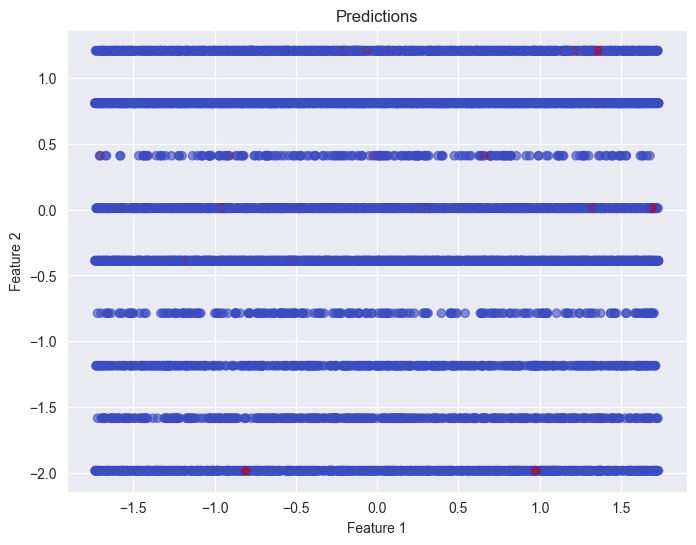

In [29]:
# Делаем предсказания на тестовом наборе
y_pred = model.predict(X_test)

evaluate_model(model, X_test, y_test, y_pred)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6)
plt.title('Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Градиентный бустинг

#### A. CatBoost

CatBoost — вариация градиентного бустинга. Он из коробки умеет работать с категориальными признаками. У него снижен риск переобучения и высокая точность. То, что нам нужно!

In [30]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Инициализация модели CatBoostClassifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass')

# Обучение модели на обучающих данных
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

evaluate_model(model, X_test, y_test, y_pred)

Confusion Matrix:
[[10037    17]
 [  637   271]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.94      0.30      0.45       908

    accuracy                           0.94     10962
   macro avg       0.94      0.65      0.71     10962
weighted avg       0.94      0.94      0.93     10962


Accuracy: 0.9403393541324576

ROC AUC Score: Not available for this model


#### B. XGBoost

XGBoost — реализация градиентного бустинга, который последовательно строит деревья решений, минимизируя ошибку предсказания на смещении. Имеет высокую производительность и точность. Работает с пропущенными значениями. 

In [31]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Создание и обучение модели XGBoost
xg_model = xgb.XGBClassifier()
xg_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = xg_model.predict(X_test)

evaluate_model(xg_model, X_test, y_test, y_pred)

Confusion Matrix:
[[9999   55]
 [ 594  314]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.85      0.35      0.49       908

    accuracy                           0.94     10962
   macro avg       0.90      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962


Accuracy: 0.9407954752782339

ROC AUC Score: Not available for this model


# Random Forest

Random Forest является ансамблем деревьев решений, что улучшает их обобщающую способность. Метод использует множество деревьев решений, обученных на случайных подвыборках данных и признаков.

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [33]:
evaluate_model(rf_model, X_test, y_test, y_pred_rf, y_prob_rf)

Confusion Matrix:
[[10023    31]
 [  680   228]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.88      0.25      0.39       908

    accuracy                           0.94     10962
   macro avg       0.91      0.62      0.68     10962
weighted avg       0.93      0.94      0.92     10962


Accuracy: 0.9351395730706076

ROC AUC Score: 0.8793794347527756


# Деревья решений

Деревья решений легко интерпретировать и визуализировать. Они выполняют разбиение данных на подгруппы на основе признаков, создавая иерархическую структуру решений. Возможно работать с категориальными и числовыми данными, не требует предварительной обработки данных.

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [35]:
evaluate_model(dt_model, X_test, y_test, y_pred_dt)

Confusion Matrix:
[[9400  654]
 [ 488  420]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10054
           1       0.39      0.46      0.42       908

    accuracy                           0.90     10962
   macro avg       0.67      0.70      0.68     10962
weighted avg       0.90      0.90      0.90     10962


Accuracy: 0.8958219303046889

ROC AUC Score: Not available for this model


# SVM

SVM является мощным инструментом для задач классификации, особенно когда данные не линейно разделимы. Метод использует гиперплоскости для разделения классов, максимизируя зазор между ними. С помощью ядерных методов (kernel trick) SVM может эффективно работать с нелинейными данными. Но он долго обучается!

In [36]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42, probability=True, class_weight='balanced')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

In [37]:
evaluate_model(svm_model, X_test, y_test, y_pred_svm, y_prob_svm)

Confusion Matrix:
[[6852 3202]
 [ 203  705]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     10054
           1       0.18      0.78      0.29       908

    accuracy                           0.69     10962
   macro avg       0.58      0.73      0.55     10962
weighted avg       0.91      0.69      0.76     10962


Accuracy: 0.6893814997263273

ROC AUC Score: 0.7396026216142083


# Вывод

Наиболее точной оказалась модель градиентного бустинга XGBoost. CatBoost уступает лишь слегка. Иными словами, методы градиентного бустинга показали себя наиболее эффективно в нашей задаче бинарной классификации.